In [12]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split    
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv "
data = pd.read_csv(url)

In [9]:
x = data[['median_income','total_rooms']]
y = data['median_house_value']/100000
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [13]:
model = keras.Sequential([
    layers.Dense(64,activation = 'relu',input_shape=[len(x.keys())]),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(1)
])

model.compile (optimizer = 'adam', loss = 'mse',metrics = ['mae'])
hist = model.fit(x_train,y_train,epochs = 10, batch_size = 32)

Epoch 1/10


/home/franz/Documents/Lab/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - loss: 793.8102 - mae: 8.8261
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 7.1922 - mae: 1.6356
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 73.7060 - mae: 3.7534
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 31.1500 - mae: 1.7702
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 5.2933 - mae: 1.4118
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 6.4163 - mae: 1.4833
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 385.2918 - mae: 8.5805
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 1.1946 - mae: 0.7941
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 2.5683 - mae: 0.8929
Epoch 10/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - loss: 23.0670 - mae: 2.4037


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


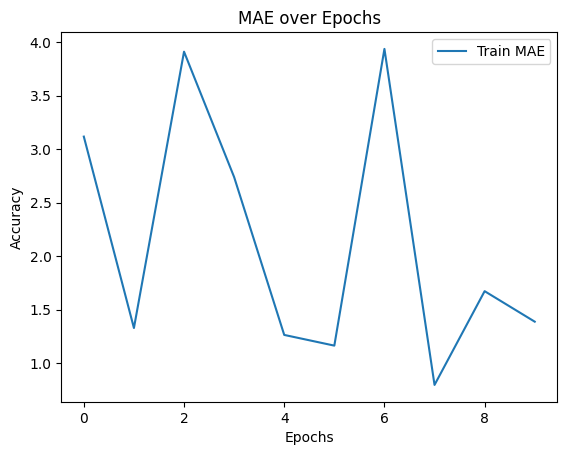

In [17]:
y_pred = model.predict(x_test)
plt.plot(hist.history['mae'], label = 'Train MAE')
#plt.plot(hist.history['mse'], label = 'Validation MSE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()